In [2]:
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score

In [33]:
true_labels = np.array([-1,     0,    1,   1,   0,   -1,   0,   0,   -1])
predictions = np.array([-0.6, 0.1, -0.3, 0.8, -10, -0.7, 0.3, 0.4, -0.8])

In [34]:
pos_labels = [1 if x==1 else 0 for x in true_labels]
neg_labels = [1 if x==-1 else 0 for x in true_labels]

In [35]:
forwardscore = roc_auc_score(pos_labels, predictions)
backwardscore = roc_auc_score(neg_labels, -predictions)

In [36]:
forwardscore, backwardscore

(0.7857142857142857, 0.8333333333333334)

In [37]:
(forwardscore+backwardscore)/2

0.8095238095238095

In [111]:
# sort predictions descending
sorted_idx = np.argsort(predictions)[::-1]
neg_sorted_idx = np.argsort(-predictions)[::-1]

In [112]:
thresholds = np.unique(predictions[sorted_idx])[::-1]

In [113]:
TPR = []
FPR = []
prev_fpr = 0

In [114]:
for i in thresholds:
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for j in range(len(sorted_idx)):
        if predictions[sorted_idx[j]] > i:
            if pos_labels[sorted_idx[j]] == 1:
                TP += 1
            else:
                FP += 1
        else:
            if pos_labels[sorted_idx[j]] == 0:
                TN += 1
            else:
                FN += 1
    
    TPR.append(TP/(TP+FN))
    FPR.append(FP/(FP+TN))
FPR = [0] + FPR + [1]
TPR = [0] + TPR + [1]

In [115]:
FPR, TPR, thresholds

([0,
  0.0,
  0.0,
  0.14285714285714285,
  0.2857142857142857,
  0.42857142857142855,
  0.42857142857142855,
  0.5714285714285714,
  0.7142857142857143,
  0.8571428571428571,
  1],
 [0, 0.0, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1],
 array([  0.8,   0.4,   0.3,   0.1,  -0.3,  -0.6,  -0.7,  -0.8, -10. ]))

Text(0, 0.5, 'TPR')

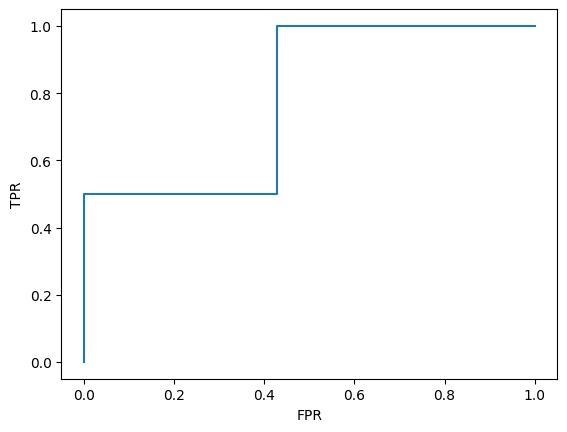

In [116]:
import matplotlib.pyplot as plt
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [117]:
np.trapz(TPR, x=FPR)

0.7857142857142857

In [104]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(pos_labels, predictions)
print(fpr, tpr, thresholds)

[0.         0.         0.42857143 0.42857143 1.        ] [0.  0.5 0.5 1.  1. ] [  1.8   0.8   0.1  -0.3 -10. ]


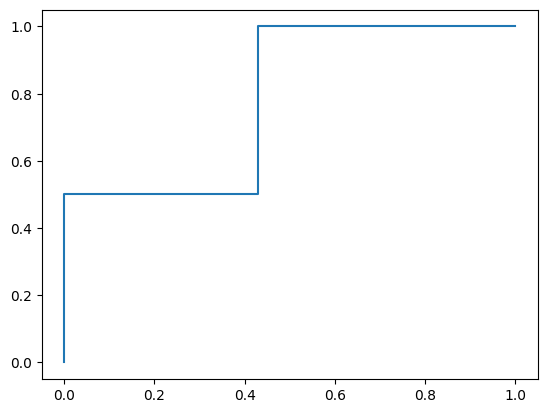

In [92]:
plt.plot(fpr, tpr)

In [93]:
np.trapz(tpr, x=fpr)

0.7857142857142857